In [1]:
!pip install ultralytics
!pip install ttach

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from ultralytics import YOLO
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

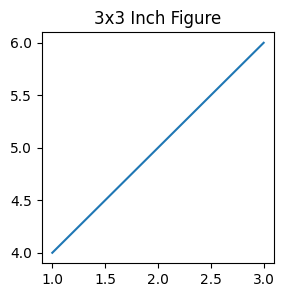

In [3]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

plt.plot([1, 2, 3], [4, 5, 6])
plt.title("3x3 Inch Figure")
plt.show()

In [ ]:
# import sys
# sys.path.append('/content/drive/MyDrive/RP/YOLO-V8-CAM')

In [4]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git
import sys
sys.path.append('/content/YOLO-V8-CAM')

fatal: destination path 'YOLO-V8-CAM' already exists and is not an empty directory.


In [5]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [12]:
# img = cv2.imread('/content/drive/MyDrive/images/test/fake/fake_0.jpg')
img = cv2.imread('/content/drive/MyDrive/RP/TestFrame/frame_1.png')
img = cv2.resize(img, (832, 832))
rgb_img = img.copy()
img = np.float32(img) / 255

In [7]:
# model = YOLO('models/yolov8n-cls.pt')
# model.cpu()
model = YOLO('/content/drive/MyDrive/RP/pt/best.pt')
model.cpu()

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_

In [ ]:
results = model(rgb_img)
print(results[0]) # Print the outputs


0: 640x640 Real 1.00, Fake 0.00, 247.6ms
Speed: 87.5ms preprocess, 247.6ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'Fake', 1: 'Real'}
obb: None
orig_img: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0

In [ ]:
model.names

{0: 'Fake', 1: 'Real'}

In [8]:
target_layers =[model.model.model[-2]]

In [9]:
cam = EigenCAM(model, target_layers,task='cls')


0: 640x640 Fake 0.98, Real 0.02, 87.7ms
Speed: 30.7ms preprocess, 87.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


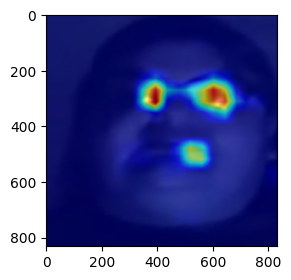

In [13]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 Fake 0.99, Real 0.01, 88.8ms
Speed: 29.6ms preprocess, 88.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'Fake', 1: 'Real'}
obb: None
orig_img: array([[[ 39,  38,  28],
        [ 39,  38,  28],
        [ 39,  38,  28],
        ...,
        [ 64,  64,  52],
        [ 64,  64,  52],
        [ 64,  64,  52]],

       [[ 39,  38,  28],
        [ 39,  38,  28],
        [ 39,  38,  28],
        ...,
        [ 64,  64,  52],
        [ 64,  64,  52],
        [ 64,  64,  52]],

       [[ 44,  43,  33],
        [ 44,  43,  33],
        [ 44,  43,  33],
        ...,
        [ 63,  63,  51],
        [ 63,  63,  51],
        [ 63,  63,  51]],

       ...,

       [[ 56,  80,  86],
        [ 56,  80,  86],
        [ 61,  85,  91],
        ...,
        [133, 134, 138],
        [133, 134, 138],
        [133, 134, 138]],

       [[ 61,  85,  91],
        [ 61

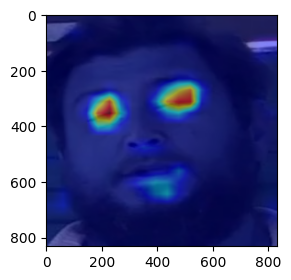

In [ ]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

In [ ]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4]]


0: 640x640 Fake 0.99, Real 0.01, 132.3ms
Speed: 36.9ms preprocess, 132.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'Fake', 1: 'Real'}
obb: None
orig_img: array([[[ 39,  38,  28],
        [ 39,  38,  28],
        [ 39,  38,  28],
        ...,
        [ 64,  64,  52],
        [ 64,  64,  52],
        [ 64,  64,  52]],

       [[ 39,  38,  28],
        [ 39,  38,  28],
        [ 39,  38,  28],
        ...,
        [ 64,  64,  52],
        [ 64,  64,  52],
        [ 64,  64,  52]],

       [[ 44,  43,  33],
        [ 44,  43,  33],
        [ 44,  43,  33],
        ...,
        [ 63,  63,  51],
        [ 63,  63,  51],
        [ 63,  63,  51]],

       ...,

       [[ 56,  80,  86],
        [ 56,  80,  86],
        [ 61,  85,  91],
        ...,
        [133, 134, 138],
        [133, 134, 138],
        [133, 134, 138]],

       [[ 61,  85,  91],
        [ 

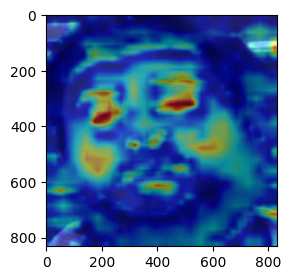

In [ ]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

In [36]:
img = cv2.imread('/content/drive/MyDrive/RP/TestFrame/frame_2.png')
img = cv2.resize(img, (832, 832))
rgb_img = img.copy()
img = np.float32(img) / 255


0: 640x640 Real 1.00, Fake 0.00, 85.3ms
Speed: 29.1ms preprocess, 85.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


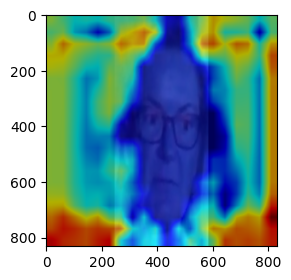

In [37]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 Fake 0.73, Real 0.27, 459.7ms
Speed: 113.3ms preprocess, 459.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


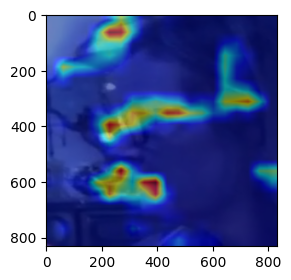

In [ ]:
import cv2
import random
import numpy as np
import os

# Function to split video and get a random frame
def get_random_frame_as_img(video_path, resize_shape=(832, 832)):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    if not video_capture.isOpened():
        raise Exception(f"Error: Unable to open video {video_path}")

    # Get total frame count
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

    if total_frames == 0:
        raise Exception("Error: The video has no frames")

    # Select a random frame index
    random_frame_index = random.randint(0, total_frames - 1)

    # Read the video frame by frame
    frame_number = 0
    selected_frame = None
    while True:
        ret, frame = video_capture.read()

        if not ret:
            break  # Break the loop when the video ends

        # Check if the current frame matches the random frame index
        if frame_number == random_frame_index:
            selected_frame = frame
            break

        frame_number += 1

    # Release the video capture
    video_capture.release()

    if selected_frame is None:
        raise Exception("Error: Unable to extract the random frame")

    # Resize and process the selected frame
    selected_frame = cv2.resize(selected_frame, resize_shape)
    rgb_img = selected_frame.copy()  # Keep a copy of the RGB image
    selected_frame = np.float32(selected_frame) / 255  # Normalize the frame

    return selected_frame, rgb_img

video_path = "/content/drive/MyDrive/RP/TestVideos/ajiyrjfyzp-1.mp4"
img, rgb_img = get_random_frame_as_img(video_path)

cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

In [21]:
import cv2
import numpy as np
import torch


video_path = '/content/drive/MyDrive/RP/TestVideos/aaasnaulhq_Real.mp4' #real
# video_path = '/content/drive/MyDrive/RP/TestVideos/alrtntfxtd_Fake.mp4' #fake

# video_path = '/content/drive/MyDrive/RP/TestVideos/kmcdjxmnoa_Real.mp4' #real
# video_path = '/content/drive/MyDrive/RP/TestVideos/ajiyrjfyzp-1_Fake.mp4' #fake

# Open the video using OpenCV
cap = cv2.VideoCapture(video_path)

# Get video frame size and fps for saving the output
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Set up the video writer to save the output video
out = cv2.VideoWriter('output_video.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))
cam = EigenCAM(model, target_layers,task='cls')

real_frames = 0
fake_frames = 0

while cap.isOpened():

    print("\n*************************************************\n")

    ret, frame = cap.read()

    if not ret:
        break

    # Convert frame to RGB as YOLO expects RGB images
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Run inference on the current frame
    results = model(frame_rgb)  # Run inference

    # Get the prediction probabilities for the first image in the batch
    probs = results[0].probs  # Extract probabilities for the first image

    # Get the predicted class ID with the highest probability
    predicted_class_id = probs.top1  # Class ID with the highest probability
    confidence = probs.data[predicted_class_id]  # Confidence score for the prediction

    # Get the class label
    label = model.names[predicted_class_id]

    if label == model.names[0]:
      fake_frames += 1
    elif label == model.names[1]:
      real_frames += 1

    # Print the prediction output for the current frame
    print(f"Predicted Class: {label}, Confidence: {confidence:.2f}")

    # Optionally, display the frame with the prediction label
    cv2.putText(frame, f'{label}: {confidence:.2f}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Write the frame with predictions to the output video
    out.write(frame)

# Release the video capture and writer objects
cap.release()
out.release()

# No need to call cv2.destroyAllWindows() in headless environments
# cv2.destroyAllWindows()

total_frames = real_frames + fake_frames

# Avoid division by zero
if total_frames > 0:
    real_percentage = real_frames / total_frames
    fake_percentage = fake_frames / total_frames
else:
    real_percentage = 0
    fake_percentage = 0

# Print the results
print(f"\nReal Frames: {real_frames}, Fake Frames: {fake_frames}, Total Frames: {total_frames}")
print(f"Real percentage: {real_percentage:.2%}, Fake percentage: {fake_percentage:.2%}")


print("Video processing complete. Output saved as 'output_video.avi'.")


204
244
30.0

*************************************************


0: 640x640 Real 1.00, Fake 0.00, 182.4ms
Speed: 64.3ms preprocess, 182.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Predicted Class: Real, Confidence: 1.00

*************************************************


0: 640x640 Real 1.00, Fake 0.00, 150.4ms
Speed: 23.9ms preprocess, 150.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Predicted Class: Real, Confidence: 1.00

*************************************************


0: 640x640 Real 0.99, Fake 0.01, 144.7ms
Speed: 20.3ms preprocess, 144.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Predicted Class: Real, Confidence: 0.99

*************************************************


0: 640x640 Real 0.99, Fake 0.01, 148.3ms
Speed: 30.1ms preprocess, 148.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Predicted Class: Real, Confidence: 0.99

*************************************************


0:


0: 640x640 Real 0.99, Fake 0.01, 87.4ms
Speed: 27.6ms preprocess, 87.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


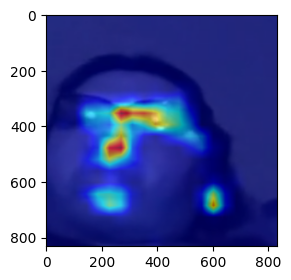


0: 640x640 Real 0.99, Fake 0.01, 78.9ms
Speed: 26.4ms preprocess, 78.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


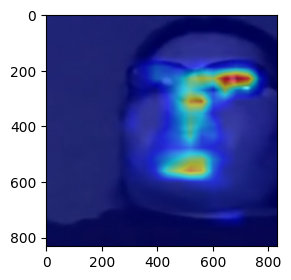


0: 640x640 Real 1.00, Fake 0.00, 79.9ms
Speed: 27.2ms preprocess, 79.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


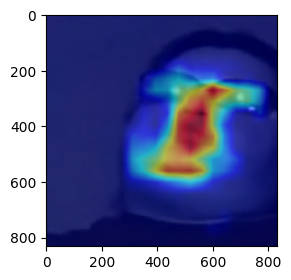


0: 640x640 Real 1.00, Fake 0.00, 79.9ms
Speed: 27.1ms preprocess, 79.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


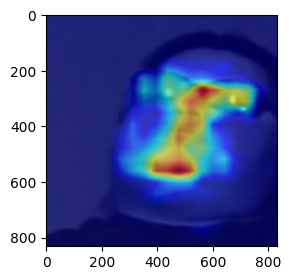


0: 640x640 Real 1.00, Fake 0.00, 81.5ms
Speed: 29.8ms preprocess, 81.5ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


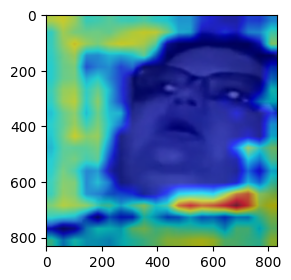

In [16]:
import cv2
import random
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to split video and get multiple random frames
def get_random_frames_as_imgs(video_path, num_frames=5, resize_shape=(832, 832)):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    if not video_capture.isOpened():
        raise Exception(f"Error: Unable to open video {video_path}")

    # Get total frame count
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

    if total_frames == 0:
        raise Exception("Error: The video has no frames")

    # Select unique random frame indices
    random_frame_indices = sorted(random.sample(range(total_frames), num_frames))

    # Read the video and extract the random frames
    frames = []
    rgb_imgs = []
    frame_number = 0
    next_index = 0

    while True:
        ret, frame = video_capture.read()

        if not ret:
            break  # Break the loop when the video ends

        # Check if the current frame matches any of the random frame indices
        if frame_number == random_frame_indices[next_index]:
            resized_frame = cv2.resize(frame, resize_shape)
            rgb_imgs.append(resized_frame.copy())  # Keep a copy of the RGB image
            normalized_frame = np.float32(resized_frame) / 255  # Normalize the frame
            frames.append(normalized_frame)

            next_index += 1
            if next_index >= len(random_frame_indices):
                break

        frame_number += 1

    # Release the video capture
    video_capture.release()

    if len(frames) < num_frames:
        raise Exception("Error: Unable to extract the required number of frames")

    return frames, rgb_imgs

video_path = '/content/drive/MyDrive/RP/TestVideos/aaasnaulhq_Real.mp4' #real
# video_path = '/content/drive/MyDrive/RP/TestVideos/alrtntfxtd_Fake.mp4' #fake

# video_path = '/content/drive/MyDrive/RP/TestVideos/kmcdjxmnoa_Real.mp4' #real
# video_path = '/content/drive/MyDrive/RP/TestVideos/ajiyrjfyzp-1_Fake.mp4' #fake


frames, rgb_imgs = get_random_frames_as_imgs(video_path)

for i, (img, rgb_img) in enumerate(zip(frames, rgb_imgs)):
    cam = EigenCAM(model, target_layers, task='cls')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
    plt.figure()
    # plt.title(f"CAM for Random Frame {i+1}")
    plt.imshow(cam_image)
    plt.show()


In [46]:
import cv2
import numpy as np
import torch


def analyze_video(video_path):
  # Open the video using OpenCV
  cap = cv2.VideoCapture(video_path)

  # Get video frame size and fps for saving the output
  frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  fps = cap.get(cv2.CAP_PROP_FPS)

  # Set up the video writer to save the output video
  out = cv2.VideoWriter('output_video.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))
  cam = EigenCAM(model, target_layers,task='cls')

  real_frames = 0
  fake_frames = 0

  while cap.isOpened():

      print("\n*************************************************\n")

      ret, frame = cap.read()

      if not ret:
          break

      # Convert frame to RGB as YOLO expects RGB images
      frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

      # Run inference on the current frame
      results = model(frame_rgb)  # Run inference

      # Get the prediction probabilities for the first image in the batch
      probs = results[0].probs  # Extract probabilities for the first image

      # Get the predicted class ID with the highest probability
      predicted_class_id = probs.top1  # Class ID with the highest probability
      confidence = probs.data[predicted_class_id]  # Confidence score for the prediction

      # Get the class label
      label = model.names[predicted_class_id]

      if label == model.names[0]:
        fake_frames += 1
      elif label == model.names[1]:
        real_frames += 1

      # Print the prediction output for the current frame
      print(f"Predicted Class: {label}, Confidence: {confidence:.2f}")

      # Optionally, display the frame with the prediction label
      cv2.putText(frame, f'{label}: {confidence:.2f}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

      img = cv2.resize(frame_rgb, (416,416))
      rgb_img = img.copy()
      img = np.float32(img) / 255

      grayscale_cam = cam(rgb_img)[0, :, :]
      cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

      plt.imshow(cam_image)
      plt.show()

      # Write the frame with predictions to the output video
      out.write(frame)

  # Release the video capture and writer objects
  cap.release()
  out.release()

  # No need to call cv2.destroyAllWindows() in headless environments
  # cv2.destroyAllWindows()

  total_frames = real_frames + fake_frames

  # Avoid division by zero
  if total_frames > 0:
      real_percentage = real_frames / total_frames
      fake_percentage = fake_frames / total_frames
  else:
      real_percentage = 0
      fake_percentage = 0

  # Print the results
  print(f"\nReal Frames: {real_frames}, Fake Frames: {fake_frames}, Total Frames: {total_frames}")
  print(f"Real percentage: {real_percentage:.2%}, Fake percentage: {fake_percentage:.2%}")


  print("Video processing complete. Output saved as 'output_video.avi'.")


In [40]:
video_path = '/content/drive/MyDrive/RP/TestVideos/aaasnaulhq_Real.mp4' #real
analyze_video(video_path)

Output hidden; open in https://colab.research.google.com to view.

In [41]:
video_path = '/content/drive/MyDrive/RP/TestVideos/alrtntfxtd_Fake.mp4' #fake
analyze_video(video_path)

Output hidden; open in https://colab.research.google.com to view.